In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load base data
# -----------------------------
# Adjust path if needed
df = pd.read_csv("trafico_limpio.csv")

# Parse dates and keep only valid ones
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')
df = df.dropna(subset=['fecha'])

# -----------------------------
# 2. Filter to target peajes
# -----------------------------
peajes_target = [
    "PTO. TRIUNFO",
    "SACHICA",
    "CASABLANCA",
    "PEAJE TUNEL LA LINEA QUINDIO",
    "CERRITOS II",
    "PEAJE TUNEL LA LINEA TOLIMA",
    "BICENTENARIO",
    "LA PARADA",
]

df = df[df['peaje'].isin(peajes_target)].copy()

# -----------------------------
# 3. Make sure direction columns exist
#    (assumes columns 'sentido_1' and 'sentido_2' are volumes)
# -----------------------------
for col in ['sentido_1', 'sentido_2']:
    if col not in df.columns:
        raise ValueError(f"Expected column '{col}' not found in DataFrame")
    df[col] = df[col].fillna(0)

# Totals by direction and combined
df['total_sentido_1'] = df['sentido_1']
df['total_sentido_2'] = df['sentido_2']
df['total_todos_sentidos'] = df['total_sentido_1'] + df['total_sentido_2']

# Sort by date just to be safe
df = df.sort_values('fecha')

df.head()


,fecha,peaje,sentido_1,sentido_2,total,tipo_dia,trm_dolar,total_sentido_1,total_sentido_2,total_todos_sentidos
5,2022-01-01,PTO. TRIUNFO,2280,1656,3936,festivo,4082.75,2280,1656,3936
12,2022-01-01,LA PARADA,0,7773,7773,festivo,4082.75,0,7773,7773
16,2022-01-01,CASABLANCA,4248,3597,7845,festivo,4082.75,4248,3597,7845
19,2022-01-02,PTO. TRIUNFO,4839,4528,9367,fin_de_semana,4082.75,4839,4528,9367
30,2022-01-02,LA PARADA,0,10851,10851,fin_de_semana,4082.75,0,10851,10851


In [3]:
# Aggregate by day across the selected peajes
daily_dir = (
    df.groupby('fecha', as_index=False)[
        ['total_sentido_1', 'total_sentido_2', 'total_todos_sentidos']
    ].sum()
)


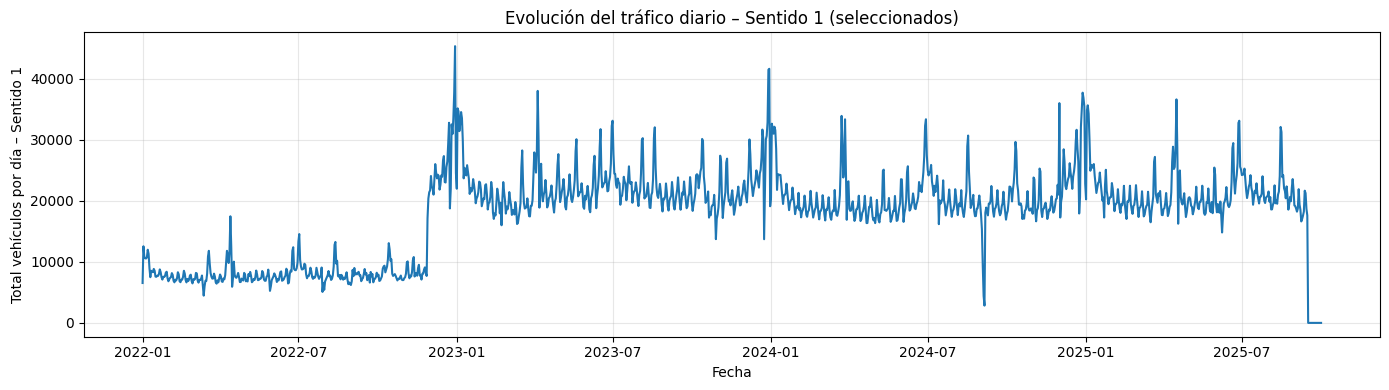

In [24]:
plt.figure(figsize=(14, 4))
plt.plot(daily_dir['fecha'], daily_dir['total_sentido_1'])
plt.title("Evolución del tráfico diario – Sentido 1 (seleccionados)")
plt.xlabel("Fecha")
plt.ylabel("Total vehículos por día – Sentido 1")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


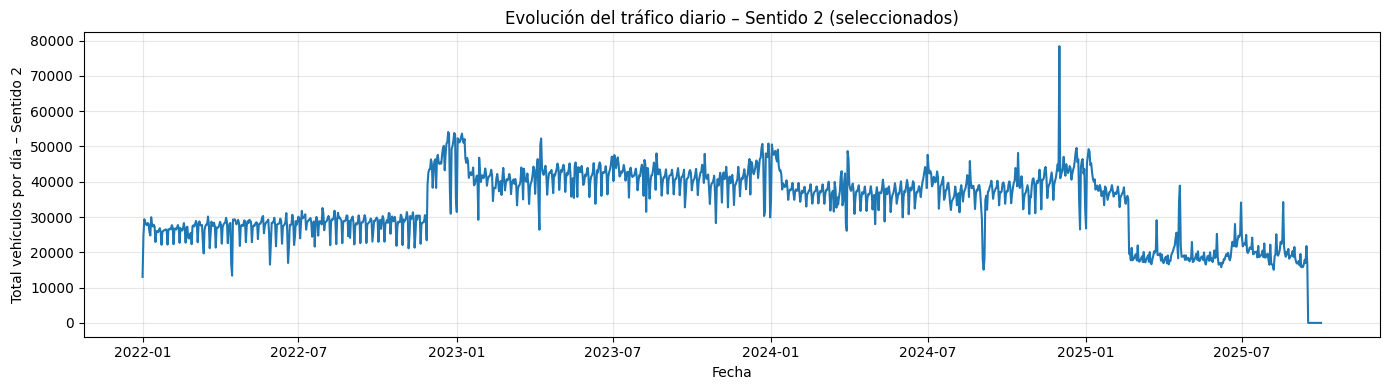

In [5]:
plt.figure(figsize=(14, 4))
plt.plot(daily_dir['fecha'], daily_dir['total_sentido_2'])
plt.title("Evolución del tráfico diario – Sentido 2 (seleccionados)")
plt.xlabel("Fecha")
plt.ylabel("Total vehículos por día – Sentido 2")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


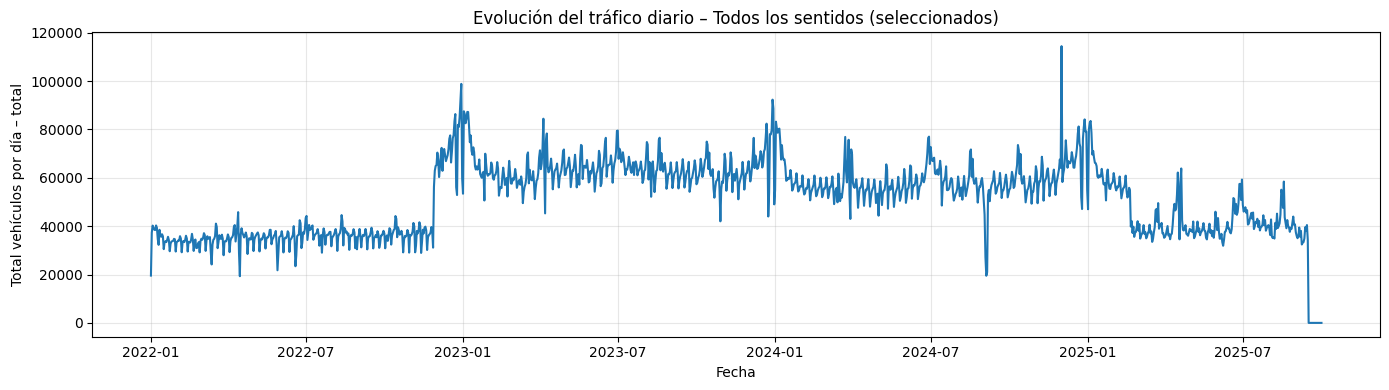

In [12]:
plt.figure(figsize=(14, 4))
plt.plot(daily_dir['fecha'], daily_dir['total_todos_sentidos'])
plt.title("Evolución del tráfico diario – Todos los sentidos (seleccionados)")
plt.xlabel("Fecha")
plt.ylabel("Total vehículos por día – total")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


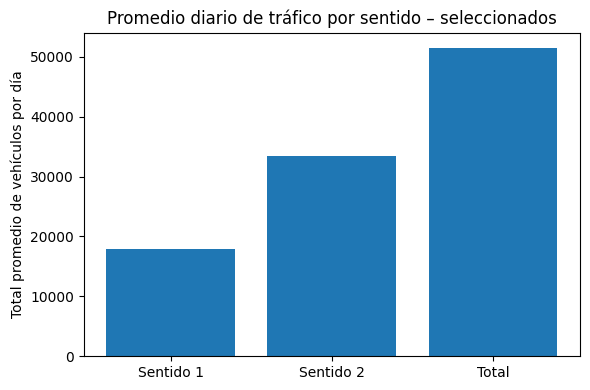

In [11]:
# Promedio diario por sentido sobre todo el período
avg_s1 = daily_dir['total_sentido_1'].mean()
avg_s2 = daily_dir['total_sentido_2'].mean()
avg_total = daily_dir['total_todos_sentidos'].mean()

sentidos = ['Sentido 1', 'Sentido 2', 'Total']
valores = [avg_s1, avg_s2, avg_total]

plt.figure(figsize=(6, 4))
plt.bar(sentidos, valores)
plt.title("Promedio diario de tráfico por sentido – seleccionados")
plt.ylabel("Total promedio de vehículos por día")
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load data
# -----------------------------
df = pd.read_csv("trafico_limpio.csv")

df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')
df = df.dropna(subset=['fecha'])

# -----------------------------
# 2. Filter to target peajes
# -----------------------------
peajes_target = [
    "PTO. TRIUNFO",
    "SACHICA",
    "CASABLANCA",
    "PEAJE TUNEL LA LINEA QUINDIO",
    "CERRITOS II",
    "PEAJE TUNEL LA LINEA TOLIMA",
    "BICENTENARIO",
    "LA PARADA",
]

df = df[df['peaje'].isin(peajes_target)].copy()

# -----------------------------
# 3. Direction totals
# -----------------------------
df['sentido_1'] = df['sentido_1'].fillna(0)
df['sentido_2'] = df['sentido_2'].fillna(0)

df['total_s1'] = df['sentido_1']
df['total_s2'] = df['sentido_2']
df['total_all'] = df['total_s1'] + df['total_s2']

# Drop rows without TRM if any
df = df.dropna(subset=['trm_dolar'])

df.head()


,fecha,peaje,sentido_1,sentido_2,total,tipo_dia,trm_dolar,total_s1,total_s2,total_all
5,2022-01-01,PTO. TRIUNFO,2280,1656,3936,festivo,4082.75,2280,1656,3936
12,2022-01-01,LA PARADA,0,7773,7773,festivo,4082.75,0,7773,7773
16,2022-01-01,CASABLANCA,4248,3597,7845,festivo,4082.75,4248,3597,7845
19,2022-01-02,PTO. TRIUNFO,4839,4528,9367,fin_de_semana,4082.75,4839,4528,9367
30,2022-01-02,LA PARADA,0,10851,10851,fin_de_semana,4082.75,0,10851,10851


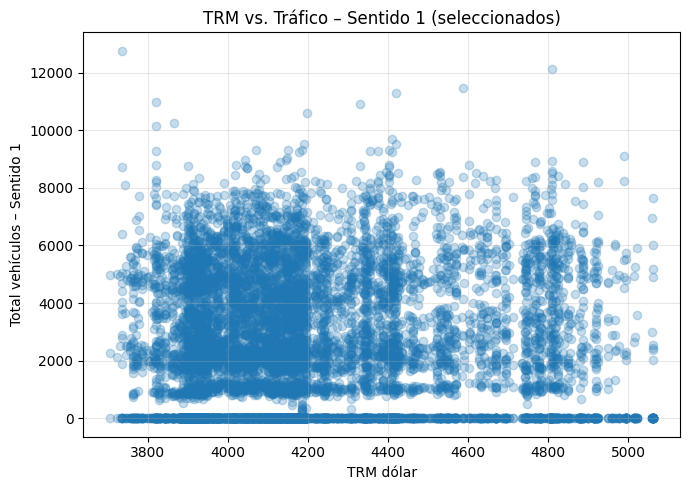

In [18]:
plt.figure(figsize=(7,5))
plt.scatter(df['trm_dolar'], df['total_s1'], alpha=0.25)
plt.title("TRM vs. Tráfico – Sentido 1 (seleccionados)")
plt.xlabel("TRM dólar")
plt.ylabel("Total vehículos – Sentido 1")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


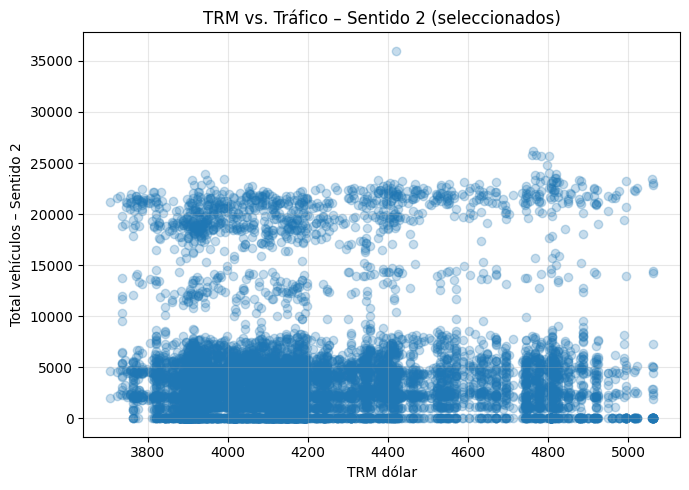

In [17]:
plt.figure(figsize=(7,5))
plt.scatter(df['trm_dolar'], df['total_s2'], alpha=0.25)
plt.title("TRM vs. Tráfico – Sentido 2 (seleccionados)")
plt.xlabel("TRM dólar")
plt.ylabel("Total vehículos – Sentido 2")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


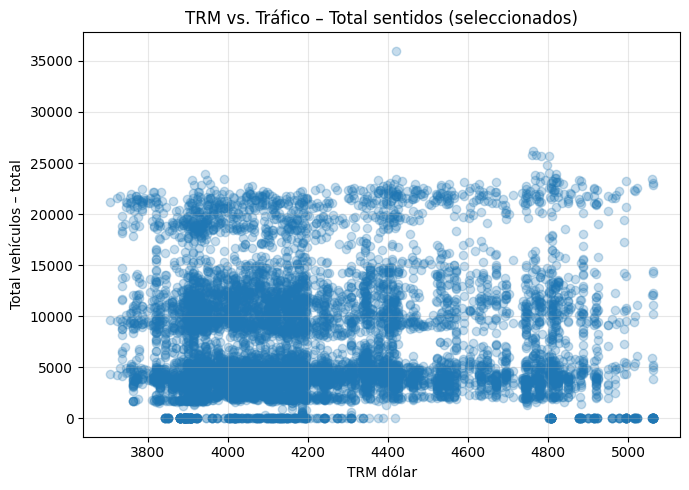

In [19]:
plt.figure(figsize=(7,5))
plt.scatter(df['trm_dolar'], df['total_all'], alpha=0.25)
plt.title("TRM vs. Tráfico – Total sentidos (seleccionados)")
plt.xlabel("TRM dólar")
plt.ylabel("Total vehículos – total")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [20]:
tipo_stats = (
    df.groupby('tipo_dia')[['total_s1','total_s2','total_all']]
      .mean()
      .reset_index()
)
tipo_stats


,tipo_dia,total_s1,total_s2,total_all
0,entre_semana,2589.410103,4933.133228,7522.543331
1,festivo,2611.777293,4674.962882,7286.740175
2,fin_de_semana,2653.578391,4696.441632,7350.020023


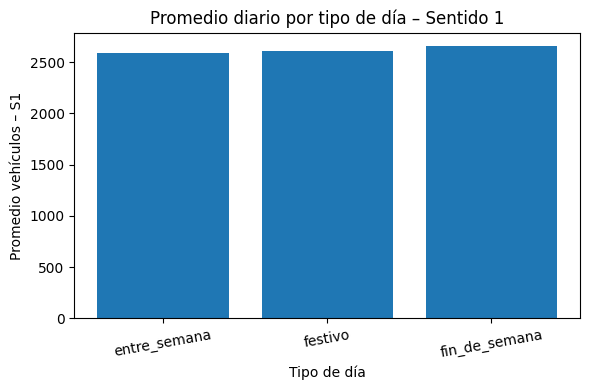

In [21]:
plt.figure(figsize=(6,4))
plt.bar(tipo_stats['tipo_dia'], tipo_stats['total_s1'])
plt.title("Promedio diario por tipo de día – Sentido 1")
plt.xlabel("Tipo de día")
plt.ylabel("Promedio vehículos – S1")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()


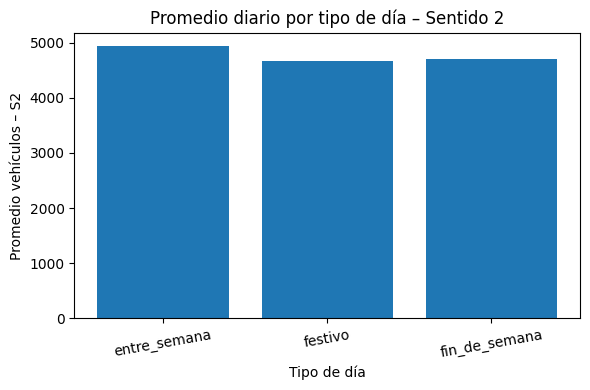

In [22]:
plt.figure(figsize=(6,4))
plt.bar(tipo_stats['tipo_dia'], tipo_stats['total_s2'])
plt.title("Promedio diario por tipo de día – Sentido 2")
plt.xlabel("Tipo de día")
plt.ylabel("Promedio vehículos – S2")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()


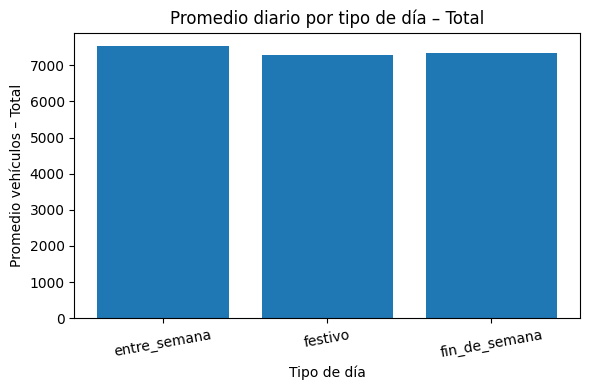

In [23]:
plt.figure(figsize=(6,4))
plt.bar(tipo_stats['tipo_dia'], tipo_stats['total_all'])
plt.title("Promedio diario por tipo de día – Total")
plt.xlabel("Tipo de día")
plt.ylabel("Promedio vehículos – Total")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
import numpy as np

# 1. Load data
df = pd.read_csv("trafico_limpio.csv")

df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')
df = df.dropna(subset=['fecha'])

# 2. Filter to target peajes
peajes_target = [
    "PTO. TRIUNFO",
    "SACHICA",
    "CASABLANCA",
    "PEAJE TUNEL LA LINEA QUINDIO",
    "CERRITOS II",
    "PEAJE TUNEL LA LINEA TOLIMA",
    "BICENTENARIO",
    "LA PARADA",
]

df = df[df['peaje'].isin(peajes_target)].copy()

# 3. Make sure direction columns exist and are numeric
for col in ['sentido_1', 'sentido_2']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# 4. Aggregate to daily level across the selected peajes
#    (TRM should be the same per day; we take the mean just in case)
daily = (
    df.groupby('fecha', as_index=False)
      .agg(
          trm_dolar=('trm_dolar', 'mean'),
          vol_s1=('sentido_1', 'sum'),
          vol_s2=('sentido_2', 'sum')
      )
)

daily['vol_total'] = daily['vol_s1'] + daily['vol_s2']

daily.head()


,fecha,trm_dolar,vol_s1,vol_s2,vol_total
0,2022-01-01,4082.75,6528,13026,19554
1,2022-01-02,4082.75,12540,24789,37329
2,2022-01-03,4082.75,10843,29378,40221
3,2022-01-04,4082.75,10577,28702,39279
4,2022-01-05,4084.11,10542,27935,38477


In [26]:
from scipy.stats import pearsonr, spearmanr

def corr_report(x, y, name_x="TRM", name_y="Volumen"):
    # Drop any missing values pairwise
    mask = (~pd.isna(x)) & (~pd.isna(y))
    x_clean = x[mask]
    y_clean = y[mask]
    
    pear_r, pear_p = pearsonr(x_clean, y_clean)
    spear_r, spear_p = spearmanr(x_clean, y_clean)
    
    print(f"=== {name_x} vs {name_y} ===")
    print(f"Pearson r  : {pear_r: .4f}  (p={pear_p: .4g})")
    print(f"Spearman r : {spear_r: .4f}  (p={spear_p: .4g})")
    print()

# Sentido 1
corr_report(daily['trm_dolar'], daily['vol_s1'],
            name_x="TRM", name_y="Volumen Sentido 1")

# Sentido 2
corr_report(daily['trm_dolar'], daily['vol_s2'],
            name_x="TRM", name_y="Volumen Sentido 2")

# Total sentidos
corr_report(daily['trm_dolar'], daily['vol_total'],
            name_x="TRM", name_y="Volumen Total")


=== TRM vs Volumen Sentido 1 ===
Pearson r  :  0.1064  (p= 7.899e-05)
Spearman r :  0.1758  (p= 5.705e-11)

=== TRM vs Volumen Sentido 2 ===
Pearson r  :  0.2457  (p= 2.754e-20)
Spearman r :  0.2386  (p= 3.432e-19)

=== TRM vs Volumen Total ===
Pearson r  :  0.2102  (p= 3.853e-15)
Spearman r :  0.2273  (p= 1.627e-17)



In [27]:
from sklearn.linear_model import LinearRegression

def simple_regression(x, y, label):
    mask = (~pd.isna(x)) & (~pd.isna(y))
    X = x[mask].values.reshape(-1, 1)
    y_vec = y[mask].values

    model = LinearRegression()
    model.fit(X, y_vec)

    slope = model.coef_[0]
    intercept = model.intercept_
    r2 = model.score(X, y_vec)

    print(f"=== Regresión lineal: TRM → {label} ===")
    print(f"Volumen ≈ {intercept:,.2f} + {slope:,.4f} * TRM")
    print(f"R² = {r2: .4f}")
    print()

# Sentido 1
simple_regression(daily['trm_dolar'], daily['vol_s1'], "Volumen Sentido 1")

# Sentido 2
simple_regression(daily['trm_dolar'], daily['vol_s2'], "Volumen Sentido 2")

# Total
simple_regression(daily['trm_dolar'], daily['vol_total'], "Volumen Total")


=== Regresión lineal: TRM → Volumen Sentido 1 ===
Volumen ≈ 7,512.18 + 2.4908 * TRM
R² =  0.0113

=== Regresión lineal: TRM → Volumen Sentido 2 ===
Volumen ≈ 117.81 + 7.9356 * TRM
R² =  0.0604

=== Regresión lineal: TRM → Volumen Total ===
Volumen ≈ 7,629.98 + 10.4264 * TRM
R² =  0.0442



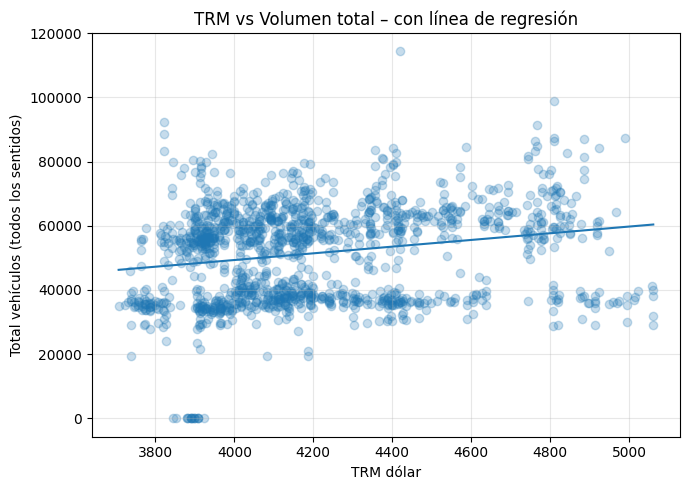

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Use daily data
mask = (~pd.isna(daily['trm_dolar'])) & (~pd.isna(daily['vol_total']))
X = daily.loc[mask, 'trm_dolar'].values.reshape(-1, 1)
y = daily.loc[mask, 'vol_total'].values

model = LinearRegression()
model.fit(X, y)

# Line for plotting
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)

plt.figure(figsize=(7,5))
plt.scatter(X, y, alpha=0.25)
plt.plot(x_line, y_line)
plt.title("TRM vs Volumen total – con línea de regresión")
plt.xlabel("TRM dólar")
plt.ylabel("Total vehículos (todos los sentidos)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
